In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## EDA and Data Cleaning

In [2]:
users_df = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")
engmt_df = pd.read_csv('takehome_user_engagement.csv', encoding = "ISO-8859-1")

In [3]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users_df.last_session_creation_time = pd.to_datetime(users_df.last_session_creation_time, format='%Y-%m-%d %H:%M:%S')

In [5]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
engmt_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
type(engmt_df.time_stamp[0])

str

In [9]:
engmt_df.time_stamp = pd.to_datetime(engmt_df.time_stamp, format='%Y-%m-%d %H:%M:%S')

In [10]:
type(engmt_df.time_stamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
engmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [12]:
max(engmt_df.time_stamp)

Timestamp('2014-06-06 14:58:50')

In [13]:
max(users_df.creation_time)

'2014-05-30 23:59:19'

## Finding Adopted Users

In [14]:
engmt_df.sort_values(by=['user_id','time_stamp'], inplace=True)
engmt_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [15]:
engmt_df.groupby(['user_id','time_stamp']).count().head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

In [16]:
adopted=engmt_df.groupby(['user_id',pd.Grouper(key='time_stamp', freq='7D')]).count().reset_index()
adopted.head()

,user_id,time_stamp,visited
0,1,2014-04-17,1
1,2,2013-11-14,1
2,2,2013-11-28,1
3,2,2013-12-05,1
4,2,2013-12-19,1


In [17]:
adopted=adopted[adopted.visited>=3]

In [18]:
adopted.groupby('user_id')['user_id'].count()

user_id
10       54
42       64
43        1
53        1
63       62
         ..
11965     1
11967     7
11969    25
11975    45
11988     6
Name: user_id, Length: 1445, dtype: int64

In [19]:
adopted_list=adopted.groupby('user_id')['user_id'].count().index.to_list()

In [20]:
users_df['adopted']=users_df.object_id.apply(lambda x: x in adopted_list)

## Factors for Predicting User Adoption

In [21]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

users_df.creation_source=users_df.creation_source.apply(lambda x: x.replace("PERSONAL_PROJECTS", "1").replace("GUEST_INVITE", "2").replace("ORG_INVITE", "3").replace("SIGNUP_GOOGLE_AUTH", "5").replace("SIGNUP", "4"))
users_df.invited_by_user_id=users_df.invited_by_user_id.fillna(0)

X=users_df[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id']].values
y=users_df['adopted'].values#.astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state=42)

y_pred = rf.fit(X_train,y_train).predict(X_test)

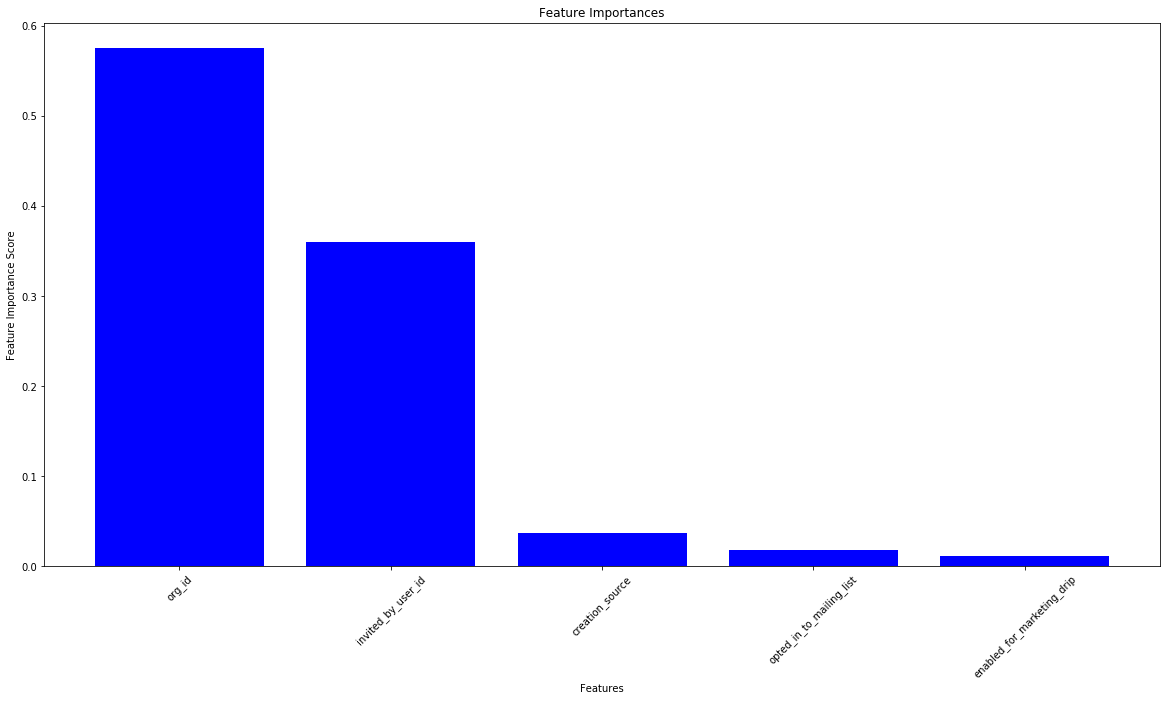

In [22]:
# feature importances:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

rf = RandomForestClassifier()
rf.fit(X, y) 
zipped = zip(users_df[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id']].columns,rf.feature_importances_)
res = sorted(zipped, key = lambda x: x[1], reverse=True)
_ = plt.figure(figsize=(20,10))
for i in res[0:20]:
    _ = plt.bar(i[0],i[1], color='blue')
    _ = plt.title('Feature Importances')
    _ = plt.xlabel('Features')
    _ = plt.xticks(rotation=45)
    _ = plt.ylabel('Feature Importance Score')
plt.savefig('FI.jpg')

In [23]:
rf.feature_importances_

array([0.03670703, 0.01789449, 0.01110301, 0.57474098, 0.3595545 ])